In [7]:
import sys
import cPickle as pickle
import gzip
from matplotlib import pyplot as plt
%matplotlib inline
sys.path.append("../modules/")
import helper
# ----
import theano
from theano import tensor as T
import lasagne
import numpy as np
np.random.seed(0)
# ---
from skimage import io

In [33]:
train_set, _, _ = helper.load_mnist()

In [34]:
Xt, yt = train_set

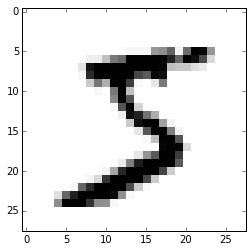

In [37]:
plt.imshow(Xt[0,0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
plt.show()

In [11]:
theta_vector = theano.shared( np.zeros((2, 3), dtype='float32').flatten() )

In [117]:
W = lasagne.init.Constant(0.0)
l_in = lasagne.layers.InputLayer((None, 1, 28, 28))
l_loc = lasagne.layers.DenseLayer(l_in, num_units=6, W=W, b=theta_vector, nonlinearity=None)
l_trans = lasagne.layers.TransformerLayer(l_in, l_loc)
X = T.tensor4('x')
get_out = theano.function([X], lasagne.layers.get_output(l_trans, X))

In [150]:
b = np.zeros((2, 3), dtype='float32')
zoom_thetas = [ (0,0), (1,1) ]
skew_thetas = [ (1,0), (0,1) ]
b[ zoom_thetas[0] ] = 1 # zoom factor on x axis (smaller = bigger zoom)
b[ zoom_thetas[1] ] = 1 # zoom factor on y axis (smaller = bigger zoom)
b[ skew_thetas[0] ] = 0 # skew factor on y axis (bigger = bigger skew)
b[ skew_thetas[1] ] = 0 # skew factor on x axis
b = b.flatten()
theta_vector.set_value(b)

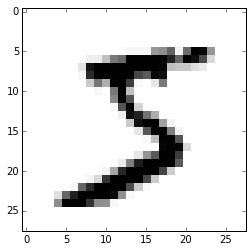

In [151]:
plt.imshow(get_out(Xt[0:1])[0,0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
plt.show()

In [14]:
def random_transform():
    b = np.zeros((2, 3), dtype='float32')
    zoom_thetas = [ (0,0), (1,1) ]
    skew_thetas = [ (1,0), (0,1) ]
    b[ zoom_thetas[0] ] = np.random.normal()
    b[ zoom_thetas[1] ] = np.random.normal()
    b[ skew_thetas[0] ] = np.random.normal()
    b[ skew_thetas[1] ] = np.random.normal()
    b = b.flatten()
    return b

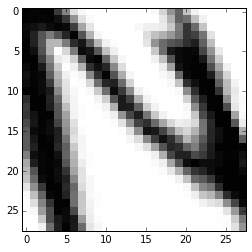

In [171]:
theta_vector.set_value( random_transform() )
plt.imshow(get_out(Xt[0:1])[0,0], interpolation='nearest', vmin=0, vmax=1, cmap='Greys')
plt.show()

----

In [30]:
theta_vector = theano.shared( np.zeros((2, 3), dtype='float32').flatten() )
W = lasagne.init.Constant(0.0)
l_in = lasagne.layers.InputLayer((None, 3, 256, 256))
l_loc = lasagne.layers.DenseLayer(l_in, num_units=6, W=W, b=theta_vector, nonlinearity=None)
l_trans = lasagne.layers.TransformerLayer(l_in, l_loc)
X = T.tensor4('x')
get_out = theano.function([X], lasagne.layers.get_output(l_trans, X))

In [33]:
np.asarray([dr_img]).shape

(1, 3, 256, 256)

In [9]:
dr_img_link = "/Volumes/CB_RESEARCH/dr-data/train-trim-256/10003_left.jpeg"

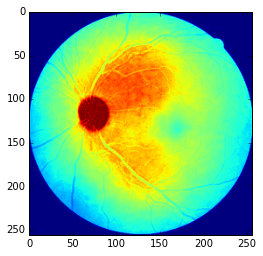

In [31]:
dr_img = helper.load_image(dr_img_link)
plt.imshow(dr_img[0])

In [42]:
get_out( np.asarray([dr_img]) )[0][0].shape

(256, 256)

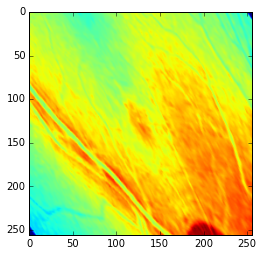

In [49]:
theta_vector.set_value( random_transform() )
plt.imshow( get_out( np.asarray([dr_img]) )[0][2] )
plt.show()